Keaton Spiller 

CS 445 

Winter 2022

Assignment # 3

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("545_cluster_dataset programming 3.txt", sep="\t+|\s+", index_col=False, usecols=None, header=None, engine='python')
print(df.shape)
data = df.to_numpy()

(1500, 2)


In [5]:
# k means clustering
r = 10 # How Many times to run the algorithm
K = 3 # Initialize the K cluster

n = df.shape[0]# observations
k_means_x1 = np.zeros((r, K)) # m mean values
k_means_x2 = np.zeros((r, K)) # m mean values
S = np.zeros((n,r))
S_value = np.zeros((n,r))
norm = np.zeros((K))
sum_difference = np.zeros((n,r,K))
sum_square_error = np.zeros((r))
cluster = np.zeros((K))
total_cluster = np.zeros((r))
data_class = np.zeros((n,n))
min_iteration = np.zeros((r))

for iteration in range(r): # Number of iterations
    for k in range(K): # number of K cluster
        # Initializing each initial K to a random value in data
        rand_row = random.randrange(0, n, 1)
        rand_column = random.randrange(0, 2, 1)
        k_means_x1[iteration,k] = data[rand_row, rand_column]
        k_means_x2[iteration,k] = data[rand_row, rand_column]

for iteration in range(r):
    for i,point in enumerate(data):# 1500
        for j in range(K): # for # of k
            x1 = point[0]
            x2 = point[1]
            x1_L2_difference = (x1 - k_means_x1[iteration,j]) ** 2
            x2_L2_difference = (x2 - k_means_x2[iteration,j]) ** 2
            norm[j] = np.sqrt(x1_L2_difference + x2_L2_difference)
            min_iteration[iteration] = np.add(min_iteration[iteration], norm[j])

        S[i,iteration] = np.argmin(norm) + 1 # +1 to remove the 0 index

    k_count = np.bincount(S[:,iteration].astype(int))
    k_count = np.delete(k_count, [0, 0], 0)
    x_1_value = np.zeros((K))
    x_2_value = np.zeros((K))
    
    for i in range(n):
        k_class = int(S[i,iteration] -1)
        x_1_value[k_class] = np.add(x_1_value[k_class], data[i,0])
        x_2_value[k_class] = np.add(x_2_value[k_class], data[i,1])
    # Update Step
    if(iteration != r-1):
        for k in range(len(k_count)):
            if(k_count[k] != 0):
                centroid = 1/k_count[k]
            if(k_count[k] == 0):
                centroid = 0.01
            k_means_x1[iteration+1,k] = centroid * x_1_value[k]
            k_means_x2[iteration+1,k] = centroid * x_2_value[k]

best_iteraction = np.argmin(min_iteration) + 1   
print(f"best iteration: {best_iteraction}")
print(min_iteration)

best iteration: 10
[9047.82999169 9389.48106933 9547.14104823 9253.44748058 9028.96365756
 8893.00322459 8826.06912476 8779.16063872 8748.51141515 8742.19066438]


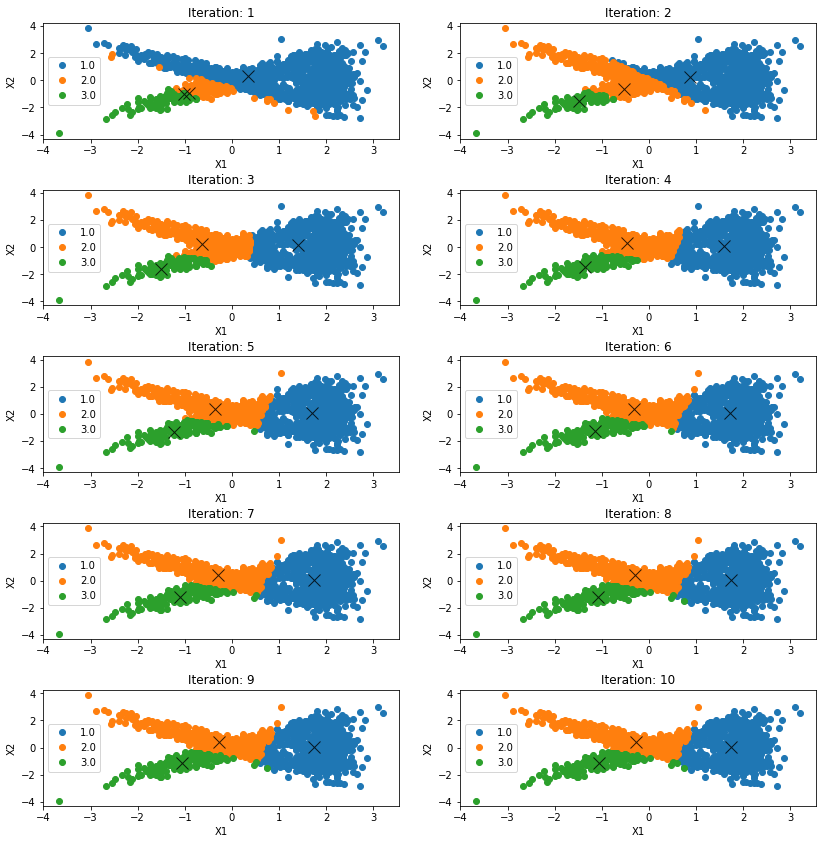

In [6]:
# Visualize k means
if(r%2 ) == 0:
    rows = math.floor(r/2)
if(r%2 ) != 0:
    rows = math.floor(r/2) + 1
    
plt.subplots(rows,2, figsize=(12,12))
plt.tight_layout(pad=3)
for iteration in (range(r)):
    d = pd.DataFrame({"X1": data[:,0], "X2": data[:,1], "K_Means": S[:,iteration]})
    groups = d.groupby("K_Means")

    plt.subplot(rows,2,(iteration+1))
    for k, group in groups:
        plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=k)
        
    plt.plot(k_means_x1[iteration,:], k_means_x2[iteration,:], c='black', marker="x",markersize=12, linestyle="",alpha = 50)
    
    plt.legend()
    plt.title("Iteration: " + str(iteration + 1) ) 
    plt.xlabel("X1") 
    plt.ylabel("X2") 
plt.show() 

In [7]:
# fuzzy c means clustering
r = 10 # How Many times to run the algorithm
C = 5 # number of clusters: c (a hyperparameter).
m = 2 # Fuzzifier: m > 1

n = df.shape[0]# observations
membership = np.zeros((n,C,r)) # m mean values
Cluster_x1 = np.zeros((C, r))
Cluster_x2 = np.zeros((C, r))
m_step_topx1 = np.zeros((n,C,r))
m_step_topx2 = np.zeros((n,C,r))
m_step_bottom = np.zeros((n,C,r))
cluster_pointx1 = np.zeros((n))
cluster_pointx2 = np.zeros((n))
min_iteration_c = np.zeros((r))
S = np.zeros((n,r))
e_step = np.zeros((C))
intermediate = np.zeros((C))
previous_cluster = 0

for iteration in range(r):
    for i in range(n):
        rand_member = np.random.dirichlet(np.ones(C, dtype=np.float16),size=1)
        for c in range(C): # number of K cluster
            membership[i, c, iteration] = rand_member[0][c]

for iteration in range(r): # r iterations

    for i in range(n):
        for c in range(C): # m step
            grade = (membership[i, c, iteration] ** m)
            m_step_topx1[i,c,iteration] = np.multiply(grade, data[i,0])
            m_step_topx2[i,c,iteration] = np.multiply(grade, data[i,1])
            m_step_bottom[i,c,iteration] = grade
            
    for i, point in enumerate(data): # e step
        
        for c in range(C):
            bottom = np.sum( m_step_bottom[:,c,iteration] , dtype="float16") #total members
            Cluster_x1_c = m_step_topx1[:,c,iteration] / bottom
            Cluster_x2_c = m_step_topx2[:,c,iteration] / bottom
            c_j = np.array([Cluster_x1_c, Cluster_x2_c])
            top = np.array([point[0] - Cluster_x1_c , point[1] - Cluster_x2_c]) # x_i - c_j
            for k in range(C):
                
                Cluster_x1_k = m_step_topx1[:,k,iteration] / bottom
                Cluster_x2_k = m_step_topx2[:,k,iteration] / bottom
                c_k = np.array([Cluster_x1_k, Cluster_x2_k])
                bottom = np.array([point[0] - Cluster_x1_k , point[1] - Cluster_x2_k ]) # x_i - c_k
                e_step[k] =  ( np.divide(np.linalg.norm(top), np.linalg.norm(bottom) ** (2 / (m-1) )))
                min_iteration_c[iteration] = np.add(min_iteration_c[iteration], e_step[k])
            
            membership[i, c,iteration] = 1 / np.sum(e_step)

    for i in range(n):
        S[i,iteration] = np.argmax(membership[i, :,iteration] )+1
        
best_iteraction = np.argmin(min_iteration_c) + 1   
print(f"best iteration: {best_iteraction}")
print(min_iteration_c)

best iteration: 7
[323.72940204 323.6415401  323.04830176 325.11538376 322.4203131
 322.07080509 321.29512748 325.22279792 324.41547896 323.90336014]


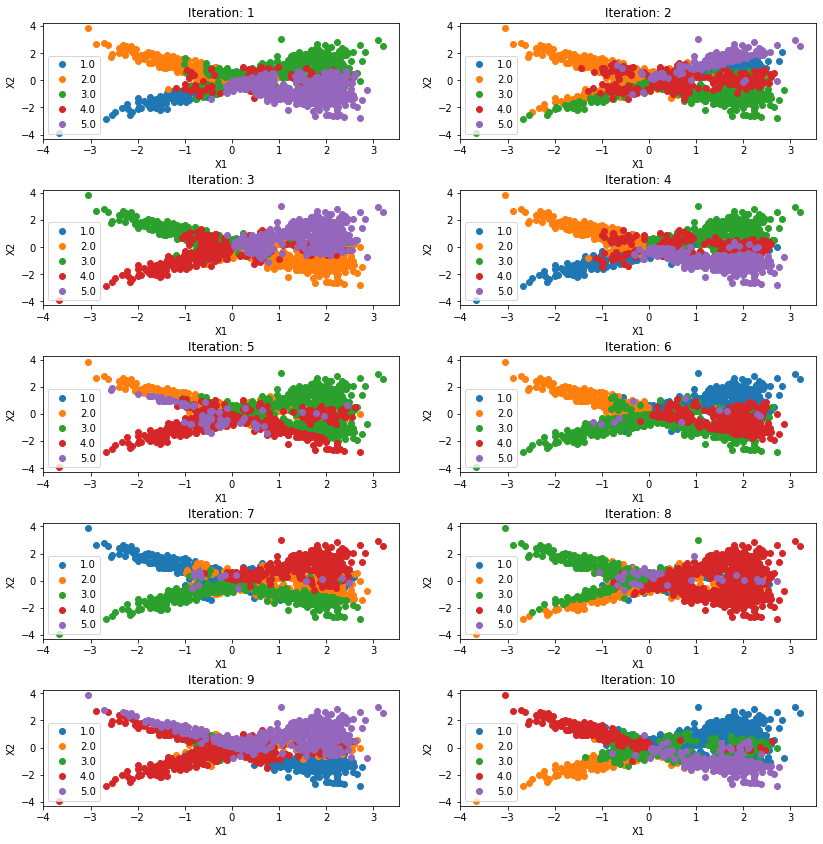

In [8]:
# Visualize Fuzzy c means
if(r%2 ) == 0:
    rows = math.floor(r/2)
if(r%2 ) != 0:
    rows = math.floor(r/2) + 1
    
plt.subplots(rows,2, figsize=(12,12))
plt.tight_layout(pad=3)

for iteration in (range(r)):
    
    d2 = pd.DataFrame({"X1": data[:,0], "X2": data[:,1], "C_Means": S[:,iteration]})
    groups = d2.groupby("C_Means")

    plt.subplot(rows,2,(iteration+1))
    for c, group in groups:
        plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=c)   
    plt.legend()
    plt.title("Iteration: " + str(iteration + 1) ) 
    plt.xlabel("X1") 
    plt.ylabel("X2") 
plt.show() 